$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\mathrm{d}}
$$

#Ideal Flow & Solutions to the Laplace Equation 
The Laplace equation for the velocity potential is only valid for incompressible and irrotational flows. In mathemtatical language we can write:

1. We assume an irrotational velocity field
$$\nabla \times \vb{u}=0\quad.$$
This is a good approximation if the flow field is far from boundaries and for not too high Reynolds numbers (not turbulent). <p>

2. Because the velocity field is irrotational we can derive the velocity field from a gradient of a scalar field $\phi$. This is named the velocity potential
$$\vb{u}=\nabla \phi\quad .$$ <p>

3. The flow field is solenoid-divergent free-incompressible-source and sink free. All these qualities are synonymous to 
$$\nabla \cdot \vb{u}=0\quad .$$<p>

Then and only then we can apply the Laplace equation 

$$\nabla^2 \phi=0$$ for the velocity potential.

This is a big improvement, first the equation is rather simple, the solution to the whole domain is give by the boundary conditions only, it is linear, and there are lots of possibilities to find analytical solutions besides the numerical solution shown in the last notebook.

##Linearity
A linear superposition of solutions is the weighted sum of their individual solutions, i.e. for $\phi_1$ and $\phi_2$ the linear superposition is

$$\phi_3=a \phi_1 + b \phi_2\quad.$$

Because the Laplace Equation is linear in $\phi$ also the superposition of solutions is a solution to the Laplace equation. Thus if $\phi_1$ and $\phi_2$ are solutions, also $\phi_3$ is a solution. This is a very important statement. It allows to compose a solutions from fundamental solutions by just adding them. This is what we are going to do next.

##Laplace Equation in polar coordinates
Sometimes it is convenient to use a polar coordinate system rather than the cartesian, and sometimes we need to switch between them. Herve are the equations for the 
Velocity potential

\begin{eqnarray*}
u_r&=&\pad{\phi}{r}\\
u_\theta&=&\frac{1}{r}\pad{\phi}{\theta}
\end{eqnarray*}

and the Laplace equation

$$\nabla^2\phi=\frac{1}{r}\pad{}{r}\left(r\pad{\phi}{r}\right) + \frac{1}{r^2}\ppad{\phi}{\theta}\quad .$$


##Fundamental solutions
We will find fundamental solutions to the Laplace equations and the combine them to describe more complex flows. 

###Uniform Flow
The velocity potential $\phi=x_1 U$ leads to the velocity field 

$$\vb{u}=\nabla \phi=U \begin{pmatrix}1\\0\end{pmatrix}\quad .$$

This is a uniform flow in the $x_1$-direction. It can be generalized to 

$$\phi=x_1 U \, t_1 + x_2 U \, t_2$$

where $\vb{t}=\vc{t}$ is the unit vector of the tangential direction of the flow and $U$ the magnitude.



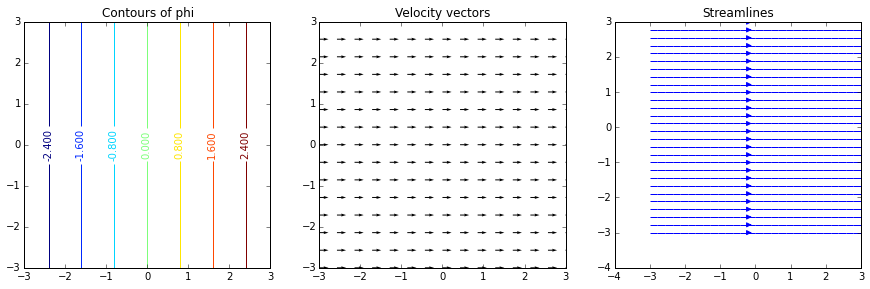

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xstart=ystart=-3 #start of grid in x and y-direction
xend=yend=3 #end of grid in x and y-direction 
steps=15 #number of gridpoints
h=(xend-xstart)/(steps-1.) #gridspacing
y=np.linspace(xstart,ystart,steps)
x=np.linspace(xstart,ystart,steps)
yy,xx=np.mgrid[xstart:xend:steps*1j,ystart:yend:steps*1j] #generate two grids (note the return order yy,xx)

U=1. #velocity
t=np.array([1.,0]) #unit vector of direction
phi=xx*U*t[0]+yy*U*t[1] #velocity potential
uy,ux=np.gradient(phi,h,h) #calculate the gradient of a scalar field (note the return order uy,ux)

plt.figure(figsize=(15,5), dpi=100)
plt.subplot(1,3,1,aspect='equal')
CS = plt.contour(xx, yy, phi)
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contours of phi")
plt.subplot(1,3,2,aspect='equal')
plt.title("Velocity vectors")
plt.quiver(xx,yy,ux,uy,angles="xy")
plt.subplot(1,3,3,aspect='equal')
plt.title("Streamlines")
plt.streamplot(xx,yy,ux,uy);

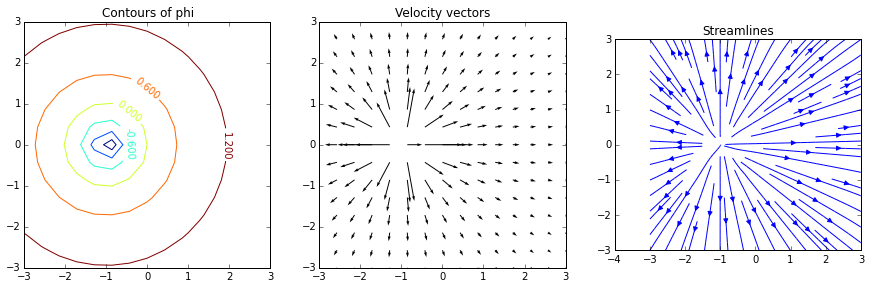

In [63]:
m=7.
x0=[-1,0]
r2=(xx-x0[0])**2+(yy-x0[1])**2
phi=m/4./np.pi*np.log(r2)
uy,ux=np.gradient(phi,h,h)

plt.figure(figsize=(15,5), dpi=100)
plt.subplot(1,3,1,aspect="equal")
CS = plt.contour(xx, yy, phi)
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contours of phi")
plt.subplot(1,3,2,aspect="equal")
plt.title("Velocity vectors")
plt.quiver(xx,yy,ux,uy,angles="xy")
plt.subplot(1,3,3,aspect="equal")
plt.title("Streamlines");
plt.streamplot(xx,yy,ux,uy);

In [49]:
#calculate the potential for a uniform flow, where U is the velocity magitude and t is the unit vector of direction 
def phi_uniform(xx,yy,U,t):
    return xx*U*t[0]+yy*U*t[1]

#calculate the potential for a source/sink flow, where m is the 
def phi_source(xx,yy,m,x0):
    r2=(xx-x0[0])**2+(yy-x0[1])**2
    return m/4./np.pi*np.log(r2)
    

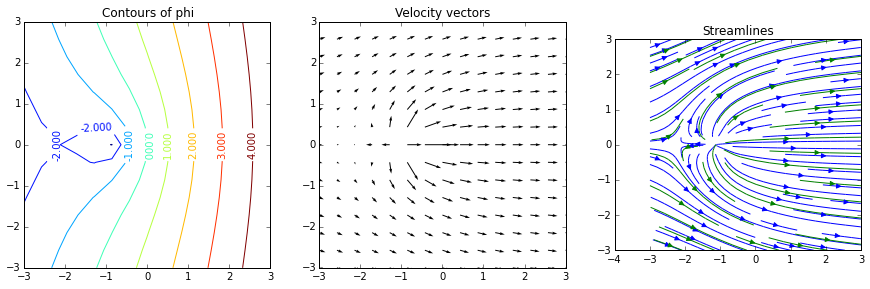

In [64]:
#now we can do a superposition
phi=phi_uniform(xx,yy,U,t)+phi_source(xx,yy,m,x0)
uy,ux=np.gradient(phi,h,h)
plt.figure(figsize=(15,5), dpi=100)
plt.subplot(1,3,1,aspect="equal")
CS = plt.contour(xx, yy, phi)
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contours of phi")
plt.subplot(1,3,2,aspect="equal")
plt.title("Velocity vectors")
plt.quiver(xx,yy,ux,uy,angles="xy")
plt.subplot(1,3,3,aspect="equal")
plt.title("Streamlines");
plt.streamplot(xx,yy,ux,uy);
plt.streamplot(xx,yy,ux,uy,density=.5);

In [38]:
h

0